## Admission Predictor A Machine Learning Project with Real Dataset
This Project is tested on a Dataset having around 10,000 real entry test results. 
A consolidated Merit List (Descending Order) is prepared on applicants' 
performance where admission is offered to toppers on first preferred choice. 
Applicants set the minimum boarder line called Merit Line by paying the fee against offered 
program. Merit Line drops when lowest candidate of First Merit List does not pay the fee. 
In consequent Merit Lists, merit drops until seats are filled completely. 
Ultimately Lowest merit line is set for each Program. 
This Project will predict Admission Chance in a desired Program for Applicants (Futuristic Prediction)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
data=pd.read_excel("/workspaces/codespaces-jupyter/data/Admission Dataset.xls")
data=data.drop('SR',axis=1) 
#This section extracts the unique programs offered in university
Prog_data=data[['OFFERED','FEESTATUS','TOTALSCORE']]
Prog_data=Prog_data.dropna()
#print(Prog_data)
prog=Prog_data['OFFERED'].unique()
prog

array(['BSIR', 'BSAvM', 'BSAF', 'BSCS', 'BSAI', 'BSCGD', 'BSP', 'BSPsy',
       'BSTHM', 'BSCYS', 'BSIT', 'BBA', 'BSSE', 'BSEng', 'BSMTH', 'BSDS',
       'BEEE', 'BEBME', 'BSAFev', 'BEME', 'BEMTS', 'BSHCM', 'BCE', 'BEEP',
       'BEET', 'ADSCS', 'BSCYSev', 'BSCSev'], dtype=object)

This section finds Minimum Merit Line of each Program 

In [33]:

min_merit={}

for i in prog:
    fil1=Prog_data['OFFERED']==i
    hold=Prog_data.where(fil1)
    hold=hold['TOTALSCORE'].min()
    min_merit[i]=hold

This section shows the minimum Merit Line of each Program

In [34]:
for a, value in min_merit.items():
    print('Minimum Merit Line of Program:\t',a,':',value)

Minimum Merit Line of Program:	 BSIR : 50.35
Minimum Merit Line of Program:	 BSAvM : 40.58
Minimum Merit Line of Program:	 BSAF : 43.75
Minimum Merit Line of Program:	 BSCS : 76.02
Minimum Merit Line of Program:	 BSAI : 71.76
Minimum Merit Line of Program:	 BSCGD : 66.8
Minimum Merit Line of Program:	 BSP : 46.14
Minimum Merit Line of Program:	 BSPsy : 50.86
Minimum Merit Line of Program:	 BSTHM : 44.89
Minimum Merit Line of Program:	 BSCYS : 71.62
Minimum Merit Line of Program:	 BSIT : 69.1
Minimum Merit Line of Program:	 BBA : 41.13
Minimum Merit Line of Program:	 BSSE : 71.76
Minimum Merit Line of Program:	 BSEng : 42.15
Minimum Merit Line of Program:	 BSMTH : 46.26
Minimum Merit Line of Program:	 BSDS : 70.67
Minimum Merit Line of Program:	 BEEE : 48.72
Minimum Merit Line of Program:	 BEBME : 71.43
Minimum Merit Line of Program:	 BSAFev : 44.74
Minimum Merit Line of Program:	 BEME : 43.38
Minimum Merit Line of Program:	 BEMTS : 51.53
Minimum Merit Line of Program:	 BSHCM : 50.67
Mi

Now on basis of Minimum Merit Line, a new column is added in dataset named "Admission Chance".
1 for YES and 0 for NO. Dataset is converted into Discrete values

In [35]:
mydic={'ADM_CHANCE':0}
adm_chance=[]

def Data_Processing():
    
    flag=0
    for a in range(len(data)):
        t1=data['TOTALSCORE'][a]
        t2=data['SHORTKEY'][a]
        for b in min_merit:
            if t2==b and t1>min_merit[b]:
                adm_chance.append(1) 
                flag=1
                break
             
        if flag==0: 
            adm_chance.append(0)
        flag=0
    #print("NOW hold contains is:", len(hold))

Data_Processing()
mydic["ADM_CHANCE"]=adm_chance
mydf= pd.DataFrame(mydic)
# Adding new column to existing dataset having values 0 and 1 
data['ADM_CHANCE']=mydf

This function will predict Admission Chance by using the best ML Model on my Dataset

In [36]:
def Adm_Predictor(lr):
    import joblib
    
    matric=input('Enter Matriculation %age:\t')
    inter=input('Enter Intermediate %age:\t')
    ET=input('Enter Entry Test %age:\t')
    joblib.dump(lr,'Admission_Predictor_Model')
    model=joblib.load('Admission_Predictor_Model')
    result=model.predict([[int(matric),int(inter),int(ET)]])
    
    if result<1:
        result='No Chance of Admission'
    else: 
        result='Yes, there are bright chance of Admission'
    print('Admission Prediction is: ',result)

This function will show the performance of different ML Models applied on Dataset
so that best ML Model may be selected

X shape: (1140, 3)
y shape: (1140, 1)
X_Train data lenght:  912
y_Test data lenght:  228


/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

Final Data:    Models  R2_SCORE
0     LR  0.965434
1    SVC  0.827168
2    RFC  0.827168
3     GC  0.758035


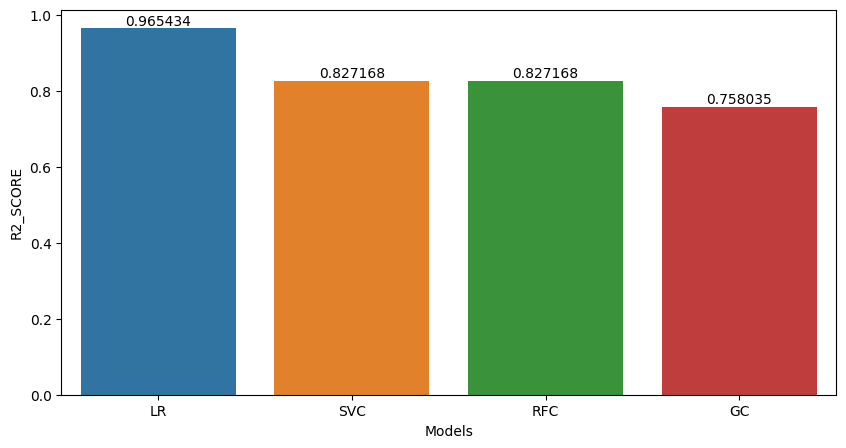

Admission Prediction is:  No Chance of Admission


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
def Model_Selection():
    
    shortkey=input('Enter Program for Admission:\t')
    shortkey=shortkey.upper()
    # Filtering big dataset on basis of asked Program for prediction
    prog_df=data.query("SHORTKEY==@shortkey")
    X=prog_df[['DEGSCORE1','DEGSCORE2','ETSCORE']]
    y=prog_df[['ADM_CHANCE']]
    print('X shape:',X.shape)
    print('y shape:',y.shape)
    # Now test and train the Model on Dataset
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)


    print('X_Train data lenght: ',len(X_train))
    print('y_Test data lenght: ',len(y_test))
    # As now data is discrete i.e. Classification problem so we apply different Classifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import mean_squared_error, accuracy_score
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    # I will apply four Classifier on Dataset and compare
    lr=LogisticRegression()
    lr.fit(X_train,y_train) 
    
    svm=SVC()
    svm.fit(X_train,y_train)

    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)

    gr=GradientBoostingClassifier()
    gr.fit(X_train,y_train)
    y_pred1=lr.predict(X_test)
    y_pred2=svm.predict(X_test)
    y_pred3=rf.predict(X_test)
    y_pred4=gr.predict(X_test)


    score1=metrics.r2_score(y_test,y_pred1)
    score2=metrics.r2_score(y_test,y_pred2)
    score3=metrics.r2_score(y_test,y_pred3)
    score4=metrics.r2_score(y_test,y_pred4)
    #print(score1,score2,score3,score4)
    Final_data=pd.DataFrame({'Models':['LR','SVC','RFC','GC'],'R2_SCORE':[score1,score2,score3,score4]})
    print('Final Data: ',Final_data)
    # Data Shows that Logistic Regression is best model for my Dataset
    class print_graph:
        def printbar(self,arg1,arg2):
            self.arg1=arg1 
            self.arg2=arg2 
            plt.figure(figsize=(10,5))
            ax=sns.barplot(x=arg1,y=arg2,data=arg2,errwidth=0)
            for i in ax.containers:
              ax.bar_label(i,)
              plt.show()
        
    obj=print_graph()
    obj.printbar(Final_data['Models'],Final_data['R2_SCORE'])
    # Graph Shows that Logistic Regression is best model for my Dataset
    Adm_Predictor(lr)

Model_Selection()
# AS we know the result of LR is more accurate. so we will choose LR model